In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [8]:
a = pd.read_csv('../Data/accepted.csv')
a.head(3)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,246

In [9]:
a.shape

(2260701, 151)

In [10]:
#Data Dictionary to review features: 
#pd.read_excel('../2. Data/LCDataDictionary.xlsx')

In [11]:
#1. Remove all obserations with No Funded Amount First, How many:
print(len(a[a.funded_amnt.isnull()]))

33


In [12]:
drop = a[a.funded_amnt.isnull()].index
a.drop(drop, axis=0, inplace=True)
a.shape

(2260668, 151)

In [13]:
#No more NaN funded amounts: 
a[a.funded_amnt.isna()].shape

(0, 151)

In [14]:
#2. How many value types for "loan_status"?
print(a.loan_status.value_counts(dropna=False).sum()) #Total matches

a.loan_status.value_counts(dropna=False)

2260668


Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [17]:
#Create new column and map Charged Off = 0, Fully Paid = 1
a['loan_status_bin'] = a['loan_status'].map({'Charged Off':0, 'Fully Paid':1})

In [18]:
#Quick Check:
a[['loan_status', 'loan_status_bin']].sample(10)

,loan_status,loan_status_bin
1044725,Charged Off,0.0
203060,Fully Paid,1.0
718711,Fully Paid,1.0
1235814,Fully Paid,1.0
919759,Fully Paid,1.0
1370498,Current,NaN
1639576,Fully Paid,1.0
1970570,Current,NaN
1011164,Current,NaN
209975,Fully Paid,1.0


In [44]:
rates = a[['int_rate', 'loan_status', 'loan_status_bin', 'grade']].dropna().reset_index(drop=True)
rates

,int_rate,loan_status,loan_status_bin,grade
0,13.99,Fully Paid,1.0,C
1,11.99,Fully Paid,1.0,C
2,10.78,Fully Paid,1.0,B
3,22.45,Fully Paid,1.0,F
4,13.44,Fully Paid,1.0,C
...,...,...,...,...
1345305,9.49,Fully Paid,1.0,B
1345306,13.99,Fully Paid,1.0,C
1345307,14.49,Charged Off,0.0,C
1345308,12.79,Fully Paid,1.0,C


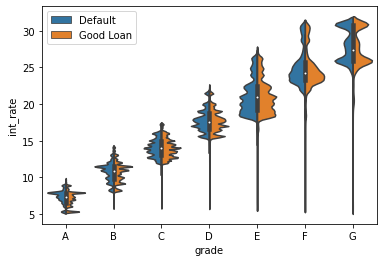

In [54]:
g = sns.violinplot(data=rates, y='int_rate', x='grade', split=True, hue='loan_status_bin',
               order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.legend(handles=g.legend_.legendHandles, labels=['Default', 'Good Loan']);

In [57]:
rates.groupby(['grade']).describe()

int_rate                                                         \
          count       mean       std   min    25%    50%    75%    max   
grade                                                                    
A      235090.0   7.113039  0.999755  5.31   6.49   7.26   7.89   9.63   
B      392741.0  10.679129  1.346523  6.00   9.71  10.91  11.53  14.09   
C      381686.0  14.021234  1.231349  6.00  12.99  13.99  14.99  17.27   
D      200953.0  17.721618  1.515058  6.00  16.59  17.57  18.75  22.35   
E       93650.0  21.138086  2.357945  6.00  19.19  20.99  22.45  27.27   
F       32058.0  24.934785  2.582373  6.00  23.28  24.24  25.78  30.75   
G        9132.0  27.725938  2.545448  6.00  25.83  27.34  30.79  30.99   

      loan_status_bin                                               
                count      mean       std  min  25%  50%  75%  max  
grade                                                               
A            235090.0  0.939593  0.238239  0.0  1.0  1.0  1.0  1.0  
B            392741.0  0.866148  0.340493  0.0  1.0  1.0  1.0  1.0  
C            381686.0  0.775604  0.417185  0.0  1.0  1.0  1.0  1.0  
D            200953.0  0.696178  0.459908  0.0  0.0  1.0  1.0  1.0  
E             93650.0  0.615216  0.486547  0.0  0.0  1.0  1.0  1.0  
F             32058.0  0.547976  0.497701  0.0  0.0  1.0  1.0  1.0  
G              9132.0  0.500657  0.500027  0.0  0.0  1.0  1.0  1.0

In [ ]:
#Should we observe all loans with interest rate greater than 20%? 